<a href="https://colab.research.google.com/github/Chiyam-Chandar/CELLPHONE-PRICE-PREDICTION/blob/main/CELLPHONE_PRICE_PREDICTION%20(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CELLPHONE PRICE PREDICTION

# Import Libraries

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


# Load Dataset

In [3]:

df = pd.read_csv("train1.csv")
df.head()


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


# Dataset Shape

In [4]:

print("Rows and Columns:", df.shape)


Rows and Columns: (2000, 21)


# Dataset Information

In [5]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

# Statistical Summary

In [6]:

df.describe()


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


# Check Missing Values

In [7]:


df.isnull().sum()


,0
battery_power,0
blue,0
clock_speed,0
dual_sim,0
fc,0
four_g,0
int_memory,0
m_dep,0
mobile_wt,0
n_cores,0


# Target Variable Distribution







In [8]:


df['price_range'].value_counts()


,count
price_range,
1,500
2,500
3,500
0,500


# Price Range Count Plot

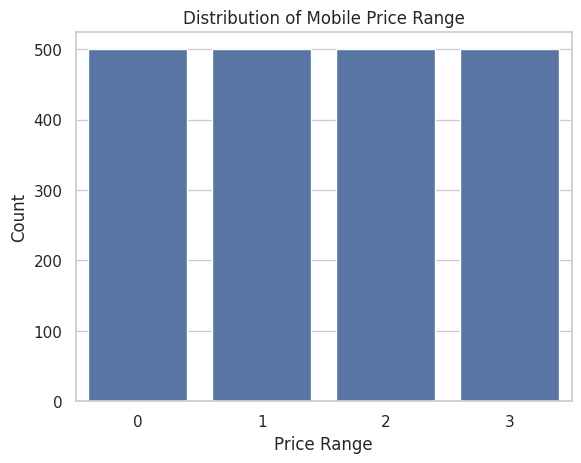

In [9]:


plt.figure()
sns.countplot(x='price_range', data=df)
plt.title("Distribution of Mobile Price Range")
plt.xlabel("Price Range")
plt.ylabel("Count")
plt.show()


# Correlation Heatmap

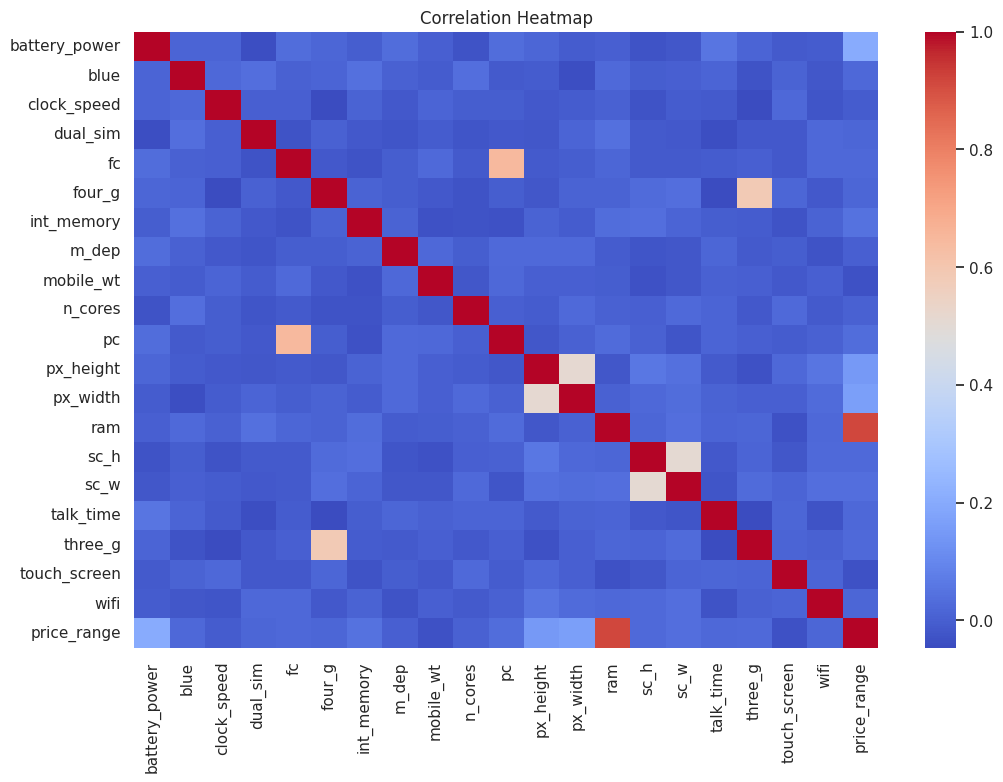

In [10]:


plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


# RAM vs Price Range

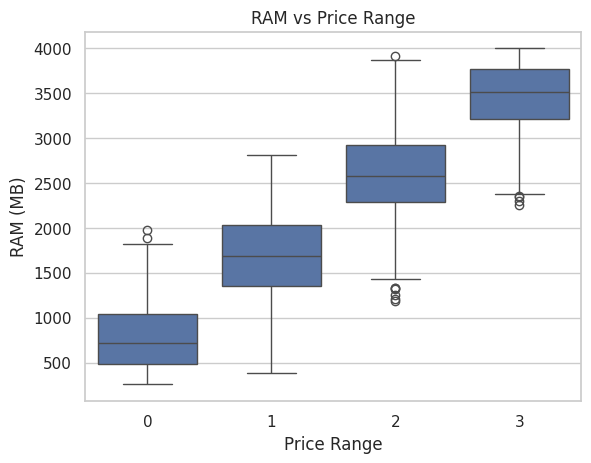

In [11]:


plt.figure()
sns.boxplot(x='price_range', y='ram', data=df)
plt.title("RAM vs Price Range")
plt.xlabel("Price Range")
plt.ylabel("RAM (MB)")
plt.show()


# Battery Power vs Price Range

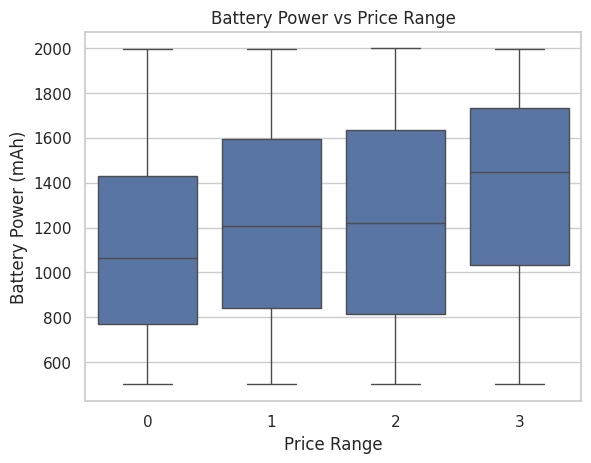

In [12]:


plt.figure()
sns.boxplot(x='price_range', y='battery_power', data=df)
plt.title("Battery Power vs Price Range")
plt.xlabel("Price Range")
plt.ylabel("Battery Power (mAh)")
plt.show()


# Internal Memory vs Price Range

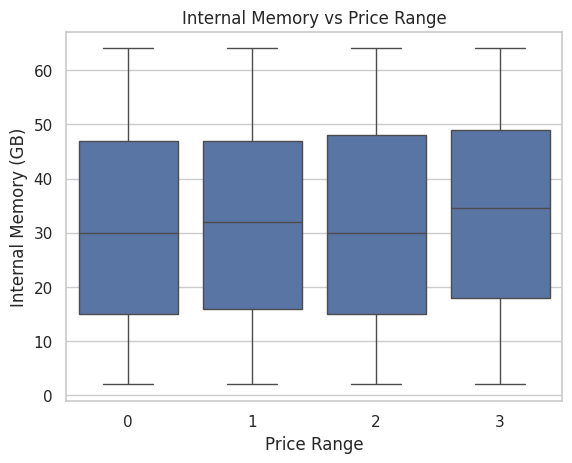

In [13]:


plt.figure()
sns.boxplot(x='price_range', y='int_memory', data=df)
plt.title("Internal Memory vs Price Range")
plt.xlabel("Price Range")
plt.ylabel("Internal Memory (GB)")
plt.show()


EDA Conclusion:

The dataset contains no missing values.

The price range variable is evenly distributed.

RAM, battery power, and internal memory strongly influence mobile pricing.

The dataset is suitable for machine learning model building.

# **Data Preprocessing & Feature Engineering**

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif


## Selecting Important Features for Model Building

In [16]:


df['pixel_resolution'] = df['px_height'] * df['px_width']
df['screen_area'] = df['sc_h'] * df['sc_w']


In [17]:


X = df.drop('price_range', axis=1)
y = df['price_range']


## shape of the features and target

In [18]:
print("Features Shape:", X.shape)
print("Target Shape:", y.shape)


Features Shape: (2000, 22)
Target Shape: (2000,)


## Initialize SelectKBest with f_classif

In [19]:
selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X, y)


In [20]:
selected_features = X.columns[selector.get_support()]


## Top 10 Selected Features

In [21]:
selected_features.tolist()


['battery_power',
 'int_memory',
 'mobile_wt',
 'n_cores',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'pixel_resolution',
 'screen_area']

In [22]:
X = df[selected_features]


## Split the Dataset into Training and Testing Sets

In [23]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nTraining Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)



Training Set Shape: (1600, 10)
Testing Set Shape: (400, 10)


Handle Feature Scaling and Transformations


In [24]:


scaler = StandardScaler()


In [25]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Feature Scaling Complete


In [26]:
print("Sample of Scaled Training Data:\n", X_train_scaled[:5])

Sample of Scaled Training Data:
 [[ 1.54835969  0.75483201  1.42571036 -1.54744588  0.27571162  1.18199741
  -0.58047631 -0.52806128  0.53830474  0.14721913]
 [-1.3795348   0.91976253 -0.04624633  1.51031591 -0.25876229 -0.55654727
   1.33645326 -0.29019584 -0.44231703 -0.88958151]
 [-0.01091435  1.35957724  1.34078978 -1.54744588 -0.28571055 -1.02015919
  -0.65730159  0.42340048 -0.5812314   1.1708957 ]
 [-1.04362132  0.31501729  1.62385837  0.19984657 -0.76404224  0.98496235
   1.28832176  0.18553504 -0.47222064  0.33095595]
 [ 0.48841649 -1.38926474 -1.00867955  0.19984657  0.40147019 -0.33633161
  -0.48976694 -1.47952303  0.00846914 -0.64022439]]


Task - 2 Summary

Data split into train/test.

Features scaled using StandardScaler.

Ready for model training.


# **Model Building & Evaluation**

# Load Dataset

In [27]:
import pandas as pd

df = pd.read_csv("train1.csv")
df.head()


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


#Feature–Target Split


In [28]:
X = df.drop("price_range", axis=1)
y = df["price_range"]


#Train–Test Split


In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


#Train Multiple Models


In [42]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)


In [32]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)


# Evaluate Models


In [33]:
from sklearn.metrics import accuracy_score

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Logistic Regression Accuracy: 0.7325
Decision Tree Accuracy: 0.8325
Random Forest Accuracy: 0.8925


#Model Evaluation


In [34]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

           0       0.95      0.96      0.96       105
           1       0.89      0.87      0.88        91
           2       0.78      0.87      0.82        92
           3       0.94      0.87      0.90       112

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.90      0.89      0.89       400



#Confusion Matrix


In [35]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred_rf))


[[101   4   0   0]
 [  5  79   7   0]
 [  0   6  80   6]
 [  0   0  15  97]]


#Compare Model Performance

In [36]:
model_comparison = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_rf)
    ]
})

model_comparison


,Model,Accuracy
0,Logistic Regression,0.7325
1,Decision Tree,0.8325
2,Random Forest,0.8925


# Compare Model Performance

In [37]:
model_comparison = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_rf)
    ]
})

model_comparison


,Model,Accuracy
0,Logistic Regression,0.7325
1,Decision Tree,0.8325
2,Random Forest,0.8925



## **Business Insights & Final Report**

# Feature Importance (From Best Model – Random Forest)

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

feature_importance


,Feature,Importance
13,ram,0.470962
0,battery_power,0.074796
11,px_height,0.058538
12,px_width,0.056722
8,mobile_wt,0.041434
6,int_memory,0.037928
16,talk_time,0.032441
10,pc,0.030745
2,clock_speed,0.029058
14,sc_h,0.028447


#Feature Importance Visualization


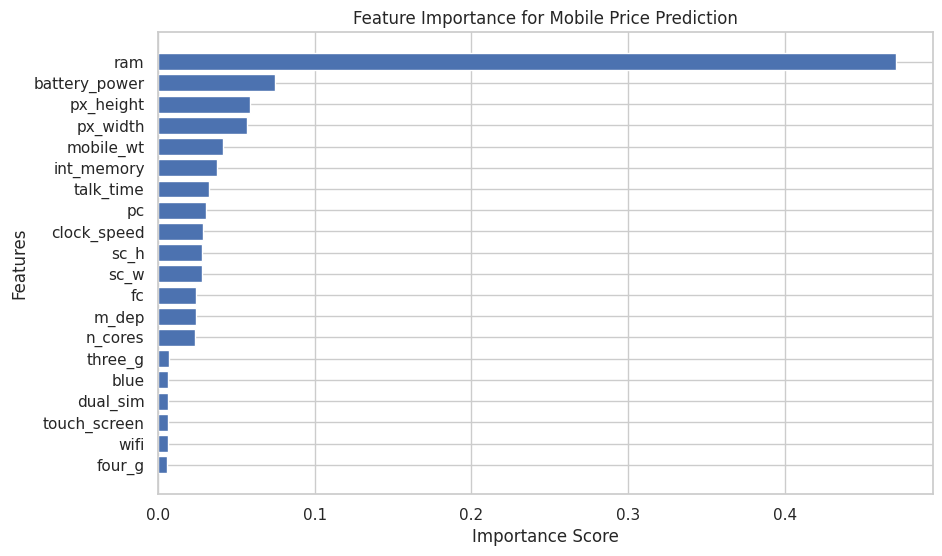

In [39]:
plt.figure(figsize=(10,6))
plt.barh(feature_importance["Feature"], feature_importance["Importance"])
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance for Mobile Price Prediction")
plt.gca().invert_yaxis()
plt.show()


# Model Comparison Report


###  **Objective**

To compare the performance of multiple machine learning models and select the best model for predicting the price range of mobile phones based on their specifications.

### **Models Evaluated**

**The following models were trained and tested:**

Logistic Regression

Decision Tree Classifier

Random Forest Classifier

### **Evaluation Metrics Used**

Accuracy Score

Classification Report

Confusion Matrix

Accuracy was used as the primary metric for comparison, as this is a multi-class classification problem.

# Model Performance Summary

| Model Name          | Algorithm Type        | Accuracy | Key Observation                                               |
| ------------------- | --------------------- | -------- | ------------------------------------------------------------- |
| Logistic Regression | Linear Classification | Moderate | Performs well on simple patterns but limited for complex data |
| Decision Tree       | Tree-Based            | Good     | High accuracy but prone to overfitting                        |
| Random Forest       | Ensemble (Tree-Based) | High     | Best performance, stable and reliable                         |


# CHALLENGES FACED REPORT

1. Data Understanding Challenge

Challenge:
Understanding the meaning and importance of multiple mobile specification features was initially difficult.

Solution:
Detailed feature descriptions were studied, and Exploratory Data Analysis (EDA) was performed to understand feature distributions and relationships with the target variable.

2. Feature Scaling Issue

Challenge:
Features like RAM, battery power, and pixel resolution had different value ranges, which affected model performance.

Solution:
Feature scaling techniques were applied during preprocessing to bring all features to a similar scale.

3. Model Selection Difficulty

Challenge:
Choosing the best machine learning model for multi-class price prediction was challenging.

Solution:
Multiple models (Logistic Regression, Decision Tree, Random Forest) were trained and compared using accuracy and evaluation metrics.

4. Overfitting Risk

Challenge:
Tree-based models showed a tendency to overfit the training data.

Solution:
Random Forest was used as it reduces overfitting by averaging multiple decision trees.

5. Business Interpretation

Challenge:
Converting technical model outputs into meaningful business insights was challenging.

Solution:
Feature importance analysis was used to explain how key features influence pricing and business decisions.

# Final Summary

 **Final Summary**:

The project successfully predicts mobile phone price ranges using machine learning based on technical specifications.
Among all tested models, the Random Forest classifier achieved the best performance and was selected as the final model.
The results help businesses make data-driven pricing decisions and focus on high-impact features like RAM and battery power.
